# 기계학습 과제1
### Tensorflow를 활용한 K-Means Clustering 프로그램 구현 및 실험

#### 필요한 패키지 로드

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns #데이터 분포를 시각화

#### 샘플 데이터 생성
- 2000개의 난수를 발생
- 난수 절반은 x값(평균:0.0, 표준편차:0.9)과 y값(평균:0.0 표준편차:0.9)을 가지고, 나머지 절반은 x값(평균:3.0, 표준편차:0.5)과 y값(평균:1.0, 표준편차:0.5)을 가짐

In [10]:
nrandom = 2000 #난수
nrand_val = []
for i in range(nrandom):
  if np.random.random() > 0.5:
    nrand_val.append([np.random.normal(0.0, 0.9),np.random.normal(0.0, 0.9)])
  else:
    nrand_val.append([np.random.normal(3.0, 0.5),np.random.normal(1.0, 0.5)])

#### nrand_val의 데이터를 표시한 산점도 그래프
- 2차원 좌표

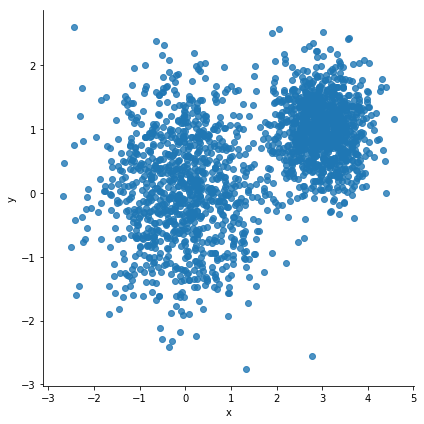

In [11]:
df = pd.DataFrame({"x": [v[0] for v in nrand_val], "y": [v[1] for v in nrand_val]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

#### 데이터를 클러스터로 그룹핑 : K-means

In [12]:
nclusters = 3 #클러스터 수
vectors = tf.constant(nrand_val)
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0,0], [nclusters,-1]))
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)
assignments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(
    expanded_vectors, expanded_centroids)), 2), 0)

- 새로운 센트로이드

In [13]:
means = []
for c in range(nclusters):
    means.append(tf.reduce_mean(tf.gather(vectors,tf.reshape(
        tf.where(tf.equal(assignments, c)), [1,-1])), reduction_indices=[1]))
new_centroids = tf.concat(means, 0)
update_centroids = tf.assign(centroids, new_centroids)

- 세션 시작

In [14]:
init_val = tf.global_variables_initializer() # 변수 초기화
sess = tf.Session()
sess.run(init_val)

In [15]:
for step in range(100): #100번 반복
   _, centroid_values, assignment_values = sess.run(
       [update_centroids, centroids, assignments])
print("centroids result")
print(centroid_values)

centroids result
[[ 0.49631113  0.26764098]
 [ 2.9830985   0.9955665 ]
 [-0.7769522  -0.26627034]]


#### 클러스터에 따라 색상으로 구분된 데이터 산포도

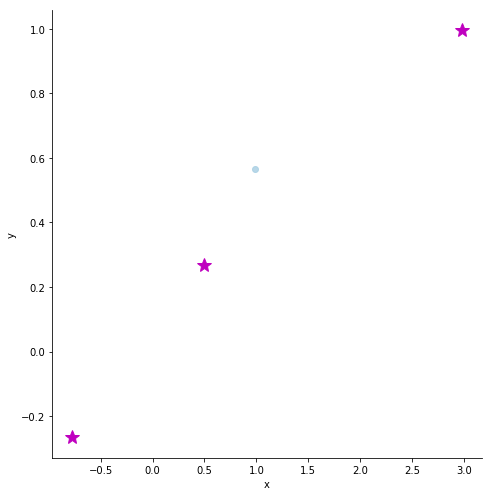

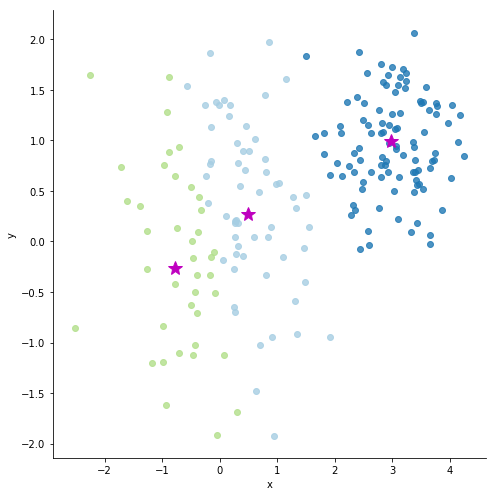

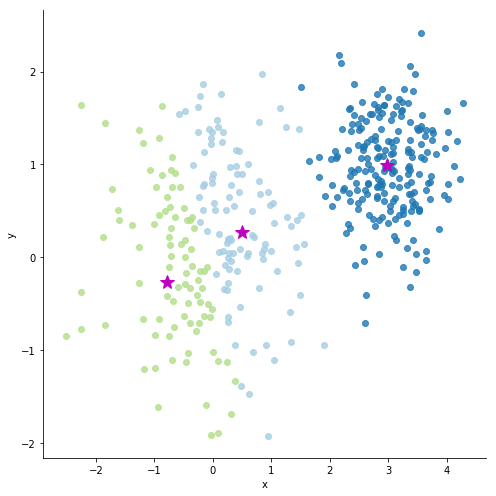

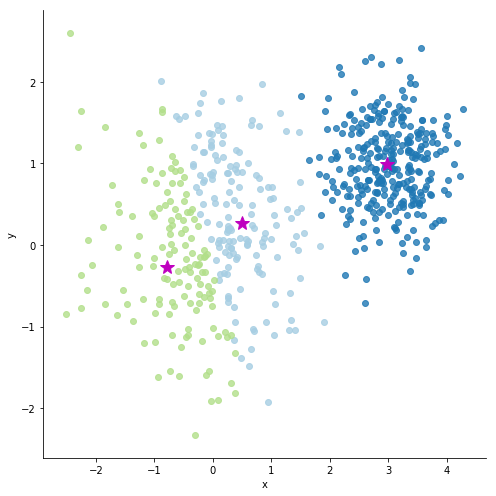

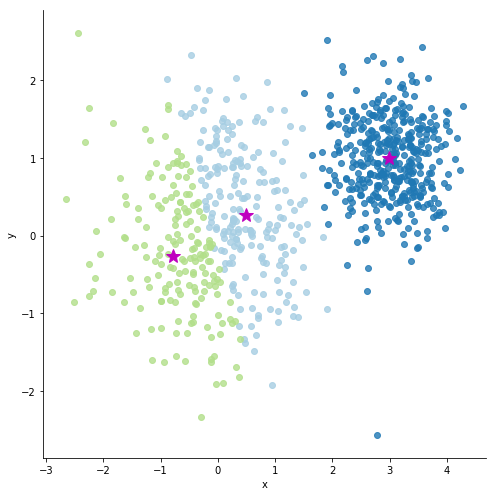

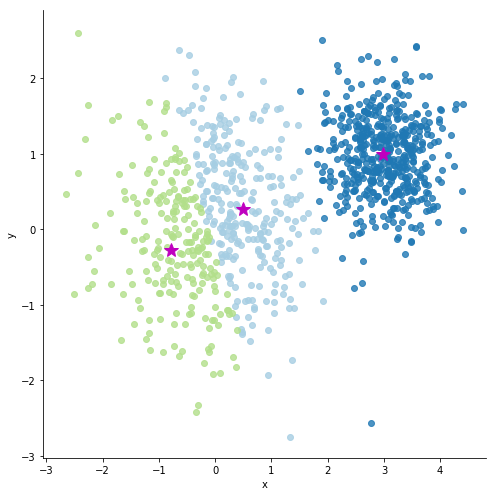

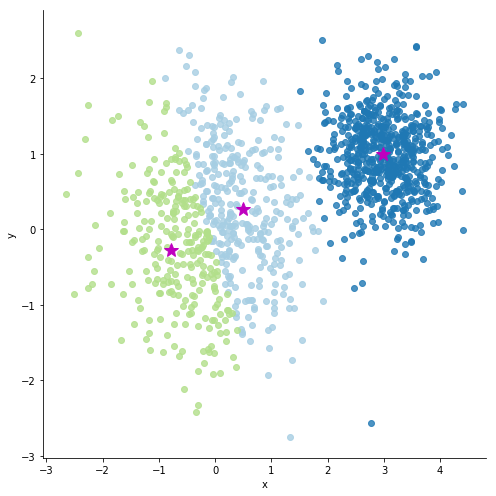

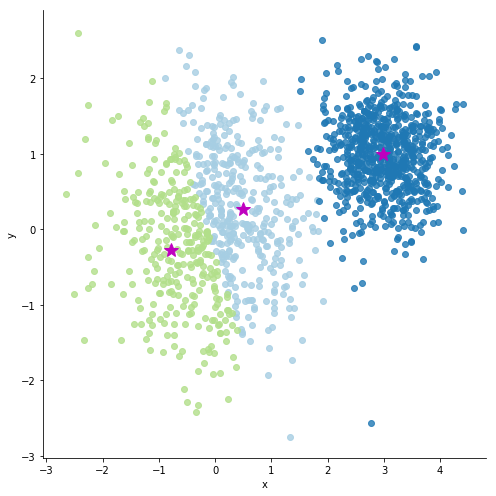

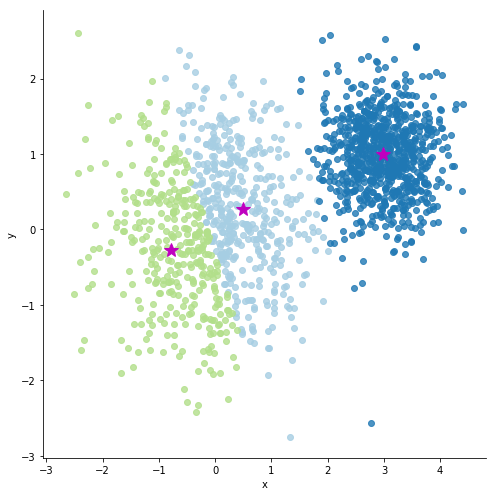

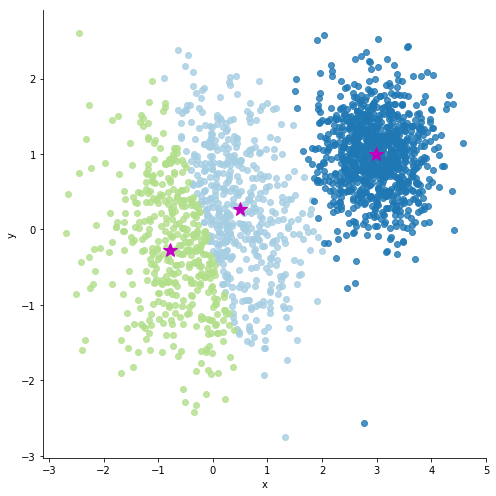

In [17]:
data = {"x": [], "y": [], "cluster": []}
for i in range(len(assignment_values)):
    data["x"].append(nrand_val[i][0])
    data["y"].append(nrand_val[i][1])
    data["cluster"].append(assignment_values[i])
    df = pd.DataFrame(data)
    if i % 200 == 0: #클러스터링 과정을 10번 보여주기
        cmap = sns.color_palette("Paired")
        sns.lmplot("x", "y", data=df, fit_reg=False, size=7, hue="cluster",legend=False, palette=cmap)
        plt.plot(centroid_values[:,0], centroid_values[:,1], 'm*', markersize=15)
        plt.show()